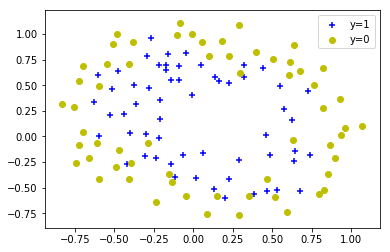

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

data2 = pd.read_csv('data/ex2data2.txt', names=['test1', 'test2', 'label'])
X = data2.iloc[:, 0:2].values
Y = data2.iloc[:, 2:].values

# 绘制y=1
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c='b', marker='+', label='y=1')
# 绘制y=0
plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], c='y', marker='o', label='y=0')
plt.legend(loc='best')
plt.show()

In [2]:
# 将2维向量转成28维向量  即假设对应的Decision Boundary函数为六次多项式
def mapFeature(x):
    assert x.ndim == 1
    assert x.shape[0] == 2
    res = np.zeros(28)
    k = 0
    for i in range(7):
        for j in range(i+1):
            res[k] = x[0]**(i-j) * x[1]**j
            k += 1
    return res
test_i = mapFeature(np.array([2,1]))
print (test_i)

[ 1.  2.  1.  4.  2.  1.  8.  4.  2.  1. 16.  8.  4.  2.  1. 32. 16.  8.
  4.  2.  1. 64. 32. 16.  8.  4.  2.  1.]


In [3]:
# X从m*2 变成m*28
X = np.apply_along_axis(mapFeature, 1, X)
print(X[:5, :])

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01  1.34745327e-04  1.83865725e-03
   2.50892595e-02  3.42353606e-01  6.90798869e-06  9.42624411e-05
   1.28625106e-03  1.75514423e-02  2.39496889e-01  3.54151856e-07
   4.83255257e-06  6.59422333e-05  8.99809795e-04  1.22782870e-02
   1.67542444e-01  1.81563032e-08  2.47750473e-07  3.38066048e-06
   4.61305487e-05  6.29470940e-04  8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01 -7.97681228e-04  5.89122275e-03
  -4.35092419e-02  3.21334672e-01  7.39785525e-05 -5.46363780e-04
   4.03513411e-03 -2.98012201e-02  2.20094970e-01 -6.86091891e-06
   5.06708697e-05 -3.74226408e-04  2.76382476e-03 -2.04120477e-02
   1.50751849e-01  6.36295342e-07 -4.69931780e-06  3.47065055e-05
  -2.56322636e-04  1.89305413e-03 -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01  4.56719641e-02
  -1.479

In [4]:
sigmoid = lambda x : 1/(1+np.exp(-x))
def costFunctionReg(theta, X, y, ld):
    # theta is n*1, X m*n, y m*1
    m, n = X.shape
    theta = theta.reshape(n,1)
    regCost = ld/(2.0*m)*np.dot(theta[1:].T, theta[1:])
    logisCost = -1.0/m*(np.dot(y.T, np.log(sigmoid(X.dot(theta)))) + np.dot((1.0-y).T, np.log(1.0-sigmoid(X.dot(theta)))))
    return logisCost+regCost
def gradientReg(theta, X, y, ld):
    m, n = X.shape
    theta = theta.reshape(n,1)
    res = (1.0/m)*np.dot(X.T, (sigmoid(X.dot(theta)) - y))
    res += ld/m*theta
    res[0] -= ld/m*theta[0]     # 因为theta0不需要正则化, 所以要将其减掉
    return res

In [5]:
# 检查损失函数和梯度下降函数是否编写正确
initial_theta = np.zeros((X.shape[1], 1))
ld = 1
print(costFunctionReg(initial_theta, X, Y, ld))
print(gradientReg(initial_theta, X, Y, ld)[:5])
test_theta = np.ones_like(initial_theta)
ld = 10.0
print(costFunctionReg(test_theta, X, Y, ld))
print(gradientReg(test_theta, X, Y, ld)[:5])


[[0.69314718]]
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
[[3.16450933]]
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [6]:
result = op.minimize(fun=costFunctionReg, x0=initial_theta.flatten(), args=(X, Y, 1), method='TNC', jac=gradientReg)
print(result)

     fun: array([[0.52900273]])
     jac: array([[-2.15093692e-06],
       [ 6.79368752e-07],
       [-3.49577679e-07],
       [ 8.75866535e-07],
       [-4.06259245e-08],
       [-9.34214065e-07],
       [-5.14591258e-07],
       [ 1.69726365e-08],
       [ 1.53770005e-08],
       [-9.73145775e-07],
       [ 6.97193774e-08],
       [ 3.54902042e-08],
       [-2.79932384e-07],
       [ 1.79650246e-07],
       [ 2.32911234e-07],
       [ 1.47163912e-07],
       [-2.12233745e-07],
       [ 6.16797892e-07],
       [-9.25488334e-08],
       [-5.27755508e-08],
       [-1.48190959e-06],
       [ 2.31245644e-07],
       [ 1.80336051e-07],
       [-1.31245933e-07],
       [-7.18506725e-08],
       [-4.12204566e-07],
       [ 1.66289338e-08],
       [-7.35101442e-07]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743188,
       -1.43166931,  0.12393226, -0.36553118, -0.357

In [7]:
theta = result['x'].reshape(28,1)
print('最优的theta为:', theta)

最优的theta为: [[ 1.27271027]
 [ 0.62529965]
 [ 1.18111686]
 [-2.019874  ]
 [-0.91743188]
 [-1.43166931]
 [ 0.12393226]
 [-0.36553118]
 [-0.35725405]
 [-0.17516293]
 [-1.45817008]
 [-0.05098418]
 [-0.61558558]
 [-0.27469166]
 [-1.19271298]
 [-0.24217841]
 [-0.20603303]
 [-0.04466177]
 [-0.27778947]
 [-0.29539514]
 [-0.45645982]
 [-1.04319155]
 [ 0.02779373]
 [-0.29244863]
 [ 0.01555758]
 [-0.32742404]
 [-0.14389149]
 [-0.92467487]]


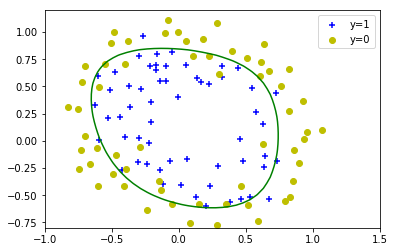

In [18]:
def plotDecisionBoundary(theta, color):
    # 因为六次多项式的函数图像很难直接画出来, 所以使用绘制等高线的方法, 最后只留z=0的等高线
    steps = 50
    uu = np.linspace(-1, 1.5, steps)
    vv = np.linspace(-1, 1.5, steps)
    u, v = np.meshgrid(uu,vv)
    u = np.array(u.flatten())
    v = np.array(v.flatten())
    sample = np.c_[u, v]
    sample = np.apply_along_axis(mapFeature, 1, sample)
    z = sample.dot(theta)
    z = z.reshape(50, 50)
    plt.contour(uu, vv, z, [0], colors=color)  # [0]表示只绘制z为0的等高线

xx = data2.iloc[:, 0:2].values
yy = data2.iloc[:, 2:].values

# 绘制y=1
plt.scatter(xx[yy[:,0]==1, 0], xx[yy[:,0]==1, 1], c='b', marker='+', label='y=1')
# 绘制y=0
plt.scatter(xx[yy[:,0]==0, 0], xx[yy[:,0]==0, 1], c='y', marker='o', label='y=0')
plt.ylim((-0.8, 1.2))
plotDecisionBoundary(theta, 'green')

plt.legend(loc='best')
plt.show()

In [31]:
# 求当lambda为1求得的参数, 用于训练集的准确率
probability = sigmoid(X.dot(theta))
predict = probability > 0.5
print('训练集准确率为: ', (predict == Y).sum() / len(Y))

训练集准确率为:  0.8305084745762712


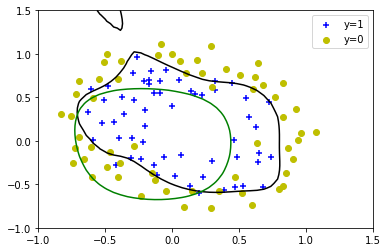

In [22]:
# 以下为选做
# 当lambda为0时
result = op.minimize(fun=costFunctionReg, x0=initial_theta.flatten(), args=(X, Y, 0), method='TNC', jac=gradientReg)
theta0 = result['x'].reshape(28,1)
# 当lambda为100时
result = op.minimize(fun=costFunctionReg, x0=initial_theta.flatten(), args=(X, Y, 100), method='TNC', jac=gradientReg)
theta100 = result['x'].reshape(28,1)

# 绘制y=1
plt.scatter(xx[yy[:,0]==1, 0], xx[yy[:,0]==1, 1], c='b', marker='+', label='y=1')
# 绘制y=0
plt.scatter(xx[yy[:,0]==0, 0], xx[yy[:,0]==0, 1], c='y', marker='o', label='y=0')
plotDecisionBoundary(theta0, 'black')
plotDecisionBoundary(theta100, 'green')
plt.legend(loc='best')
plt.show()

# 绿线为lambda为100时的Decisio boundary, 黑线为lambda为0时的Decision boundary